0.75
Early stopping at epoch 68


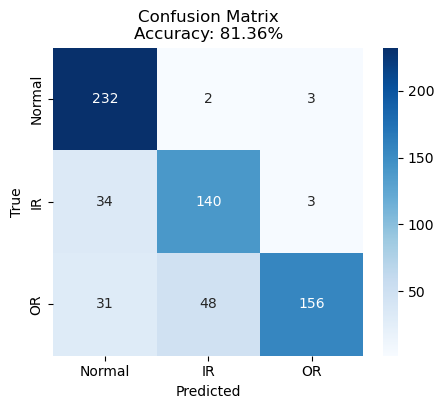

 - Model accuracy: 81.36%


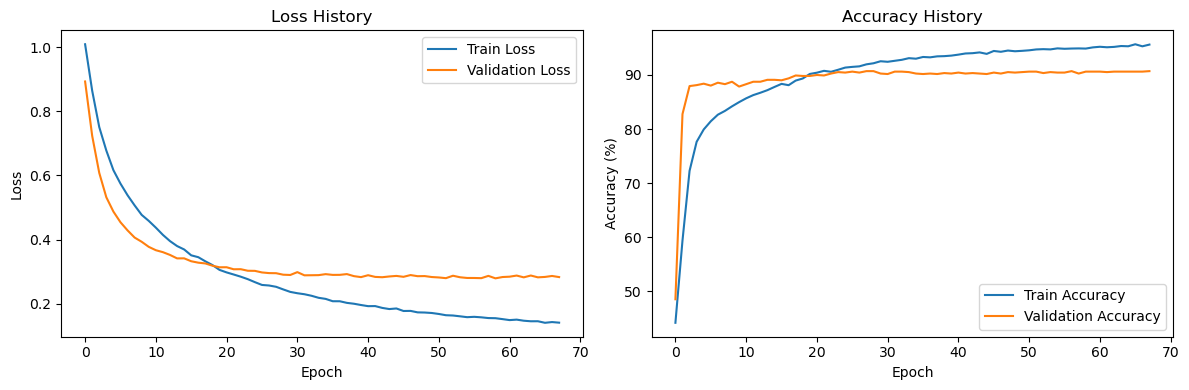

0.75
Early stopping at epoch 232


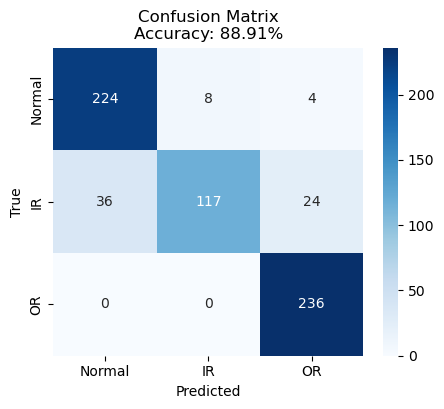

 - Model accuracy: 88.91%


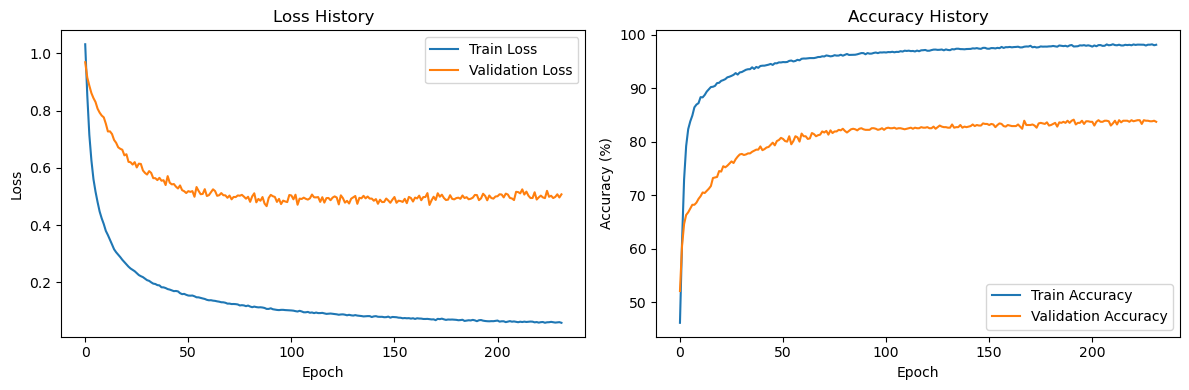

0.75
Early stopping at epoch 187


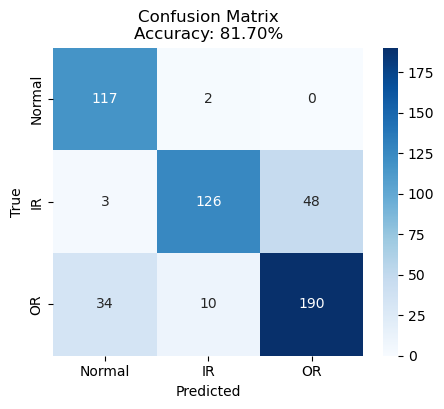

 - Model accuracy: 81.70%


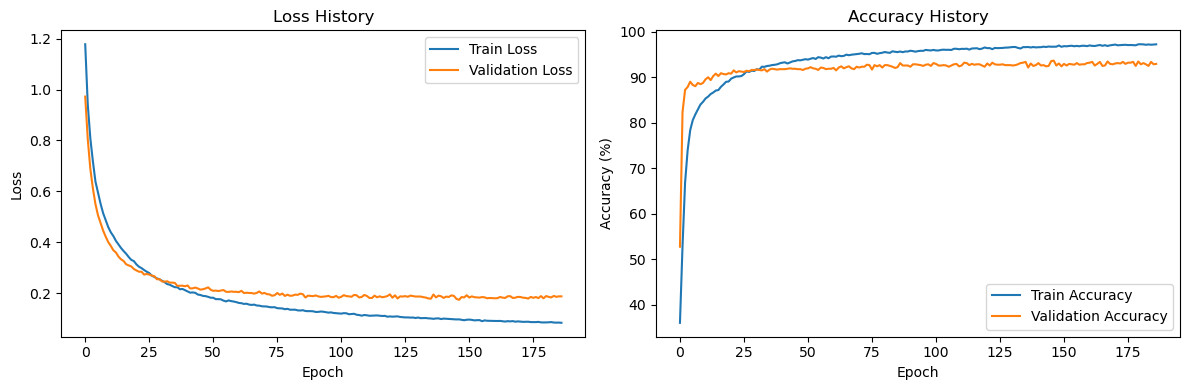

0.75
Early stopping at epoch 127


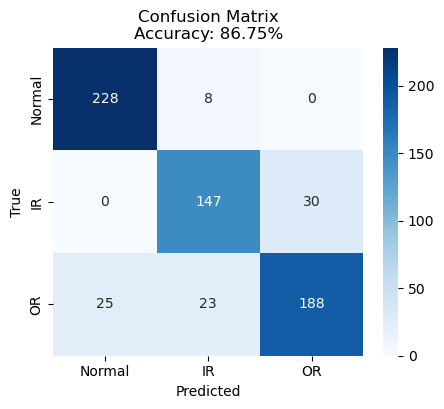

 - Model accuracy: 86.75%


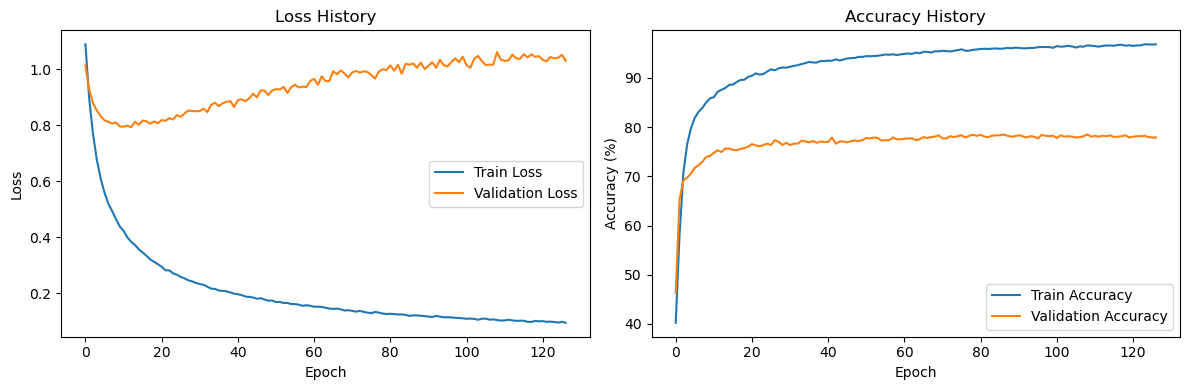

0.75
Early stopping at epoch 90


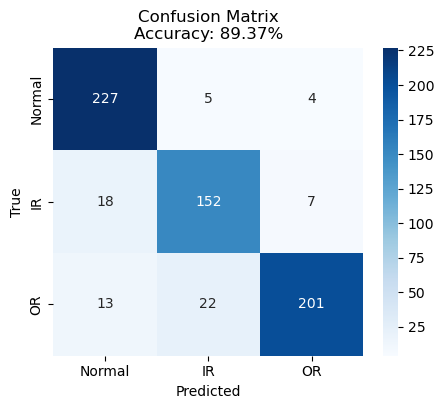

 - Model accuracy: 89.37%


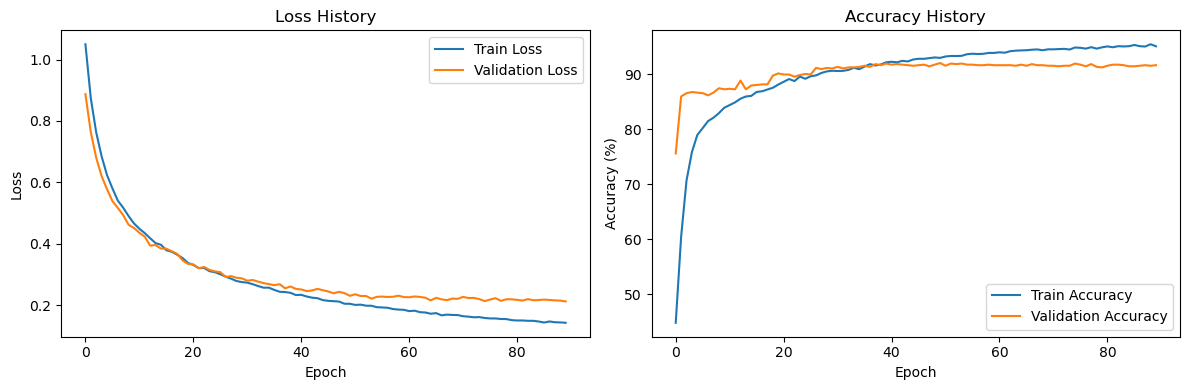

0.75
Early stopping at epoch 128


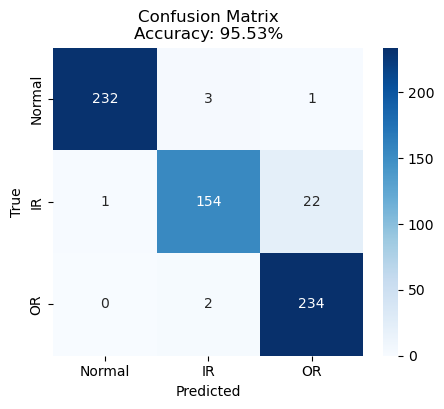

 - Model accuracy: 95.53%


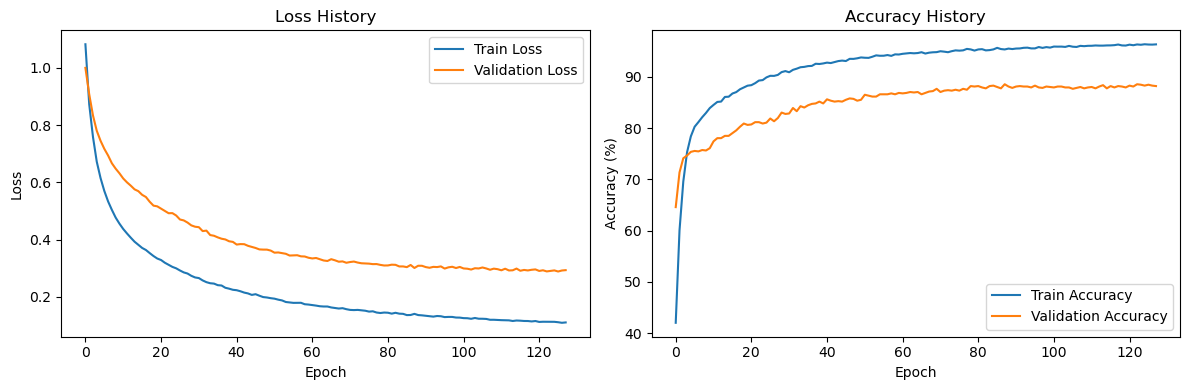

0.75
Early stopping at epoch 233


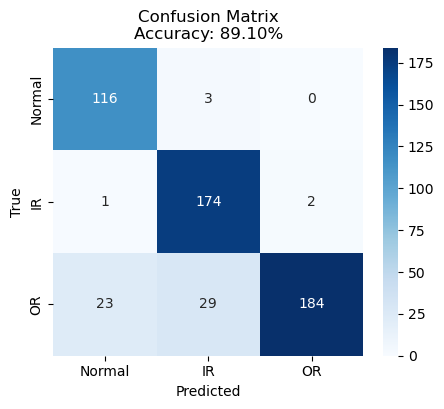

 - Model accuracy: 89.10%


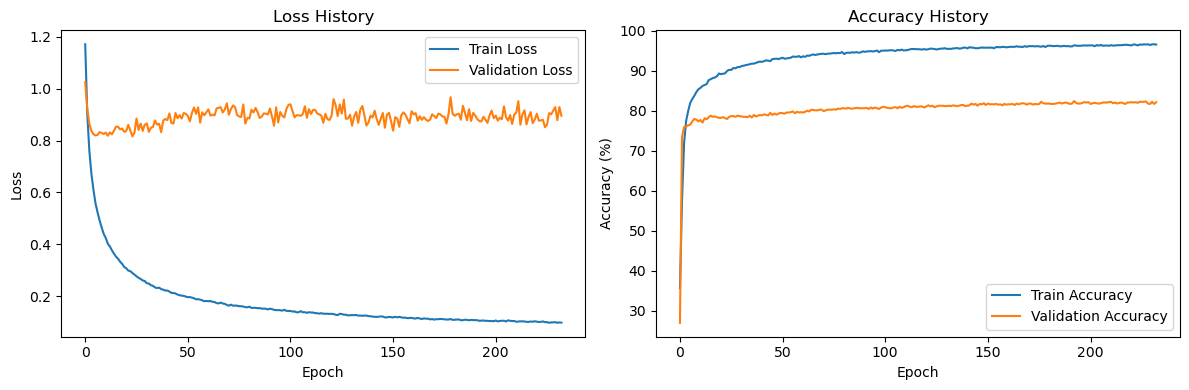

0.75
Early stopping at epoch 278


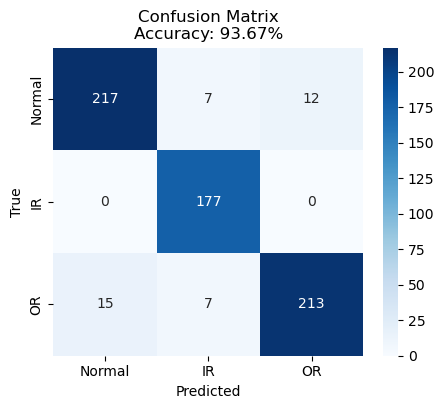

 - Model accuracy: 93.67%


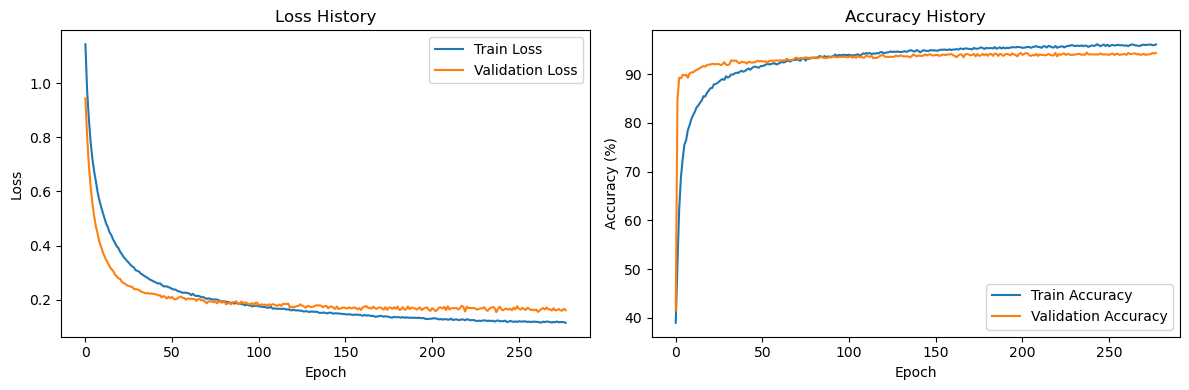

0.75
Early stopping at epoch 213


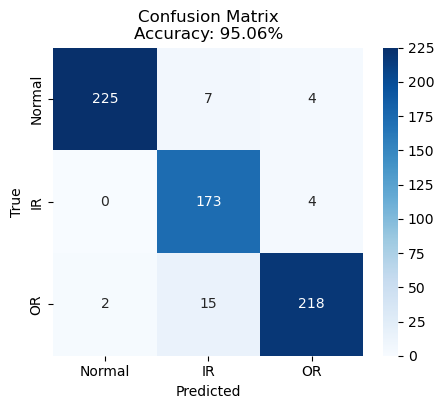

 - Model accuracy: 95.06%


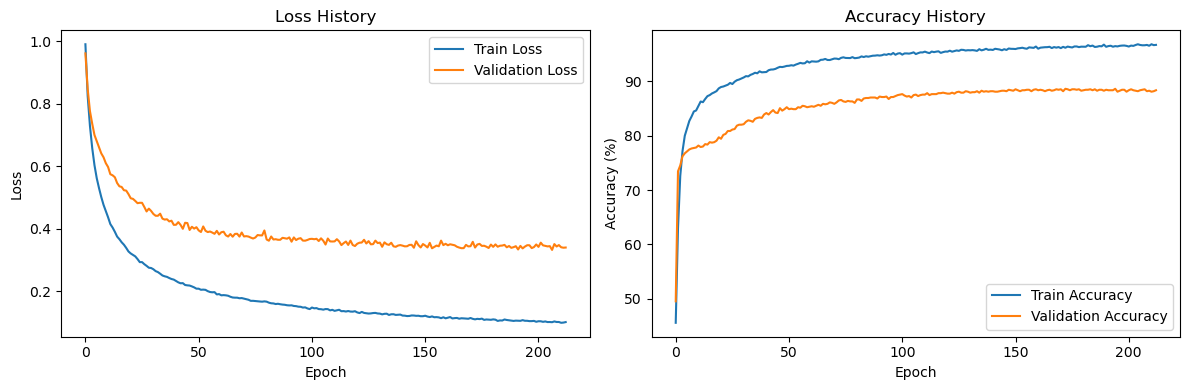

0.75
Early stopping at epoch 197


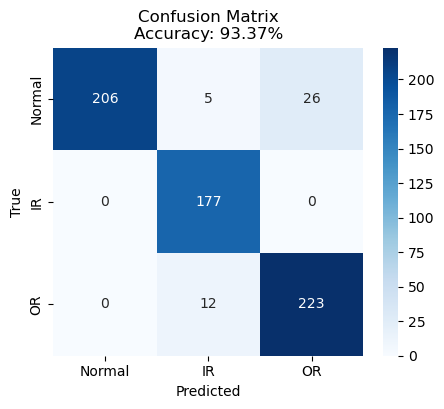

 - Model accuracy: 93.37%


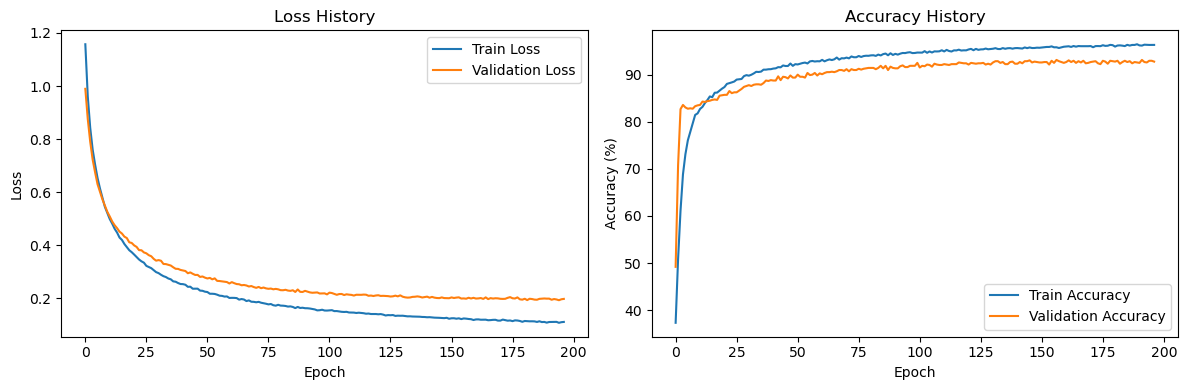

0.75
Early stopping at epoch 157


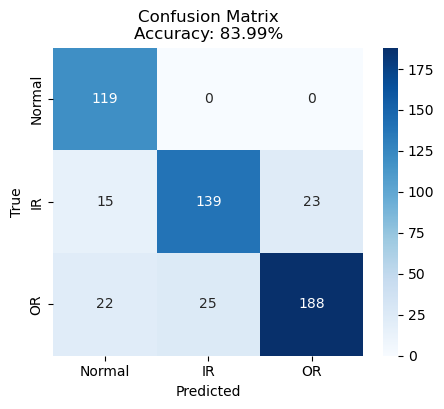

 - Model accuracy: 83.99%


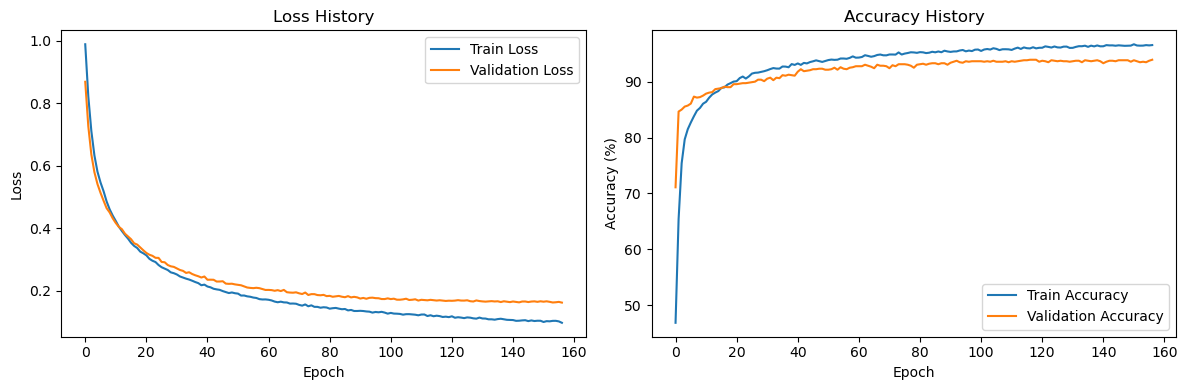

0.75
Early stopping at epoch 188


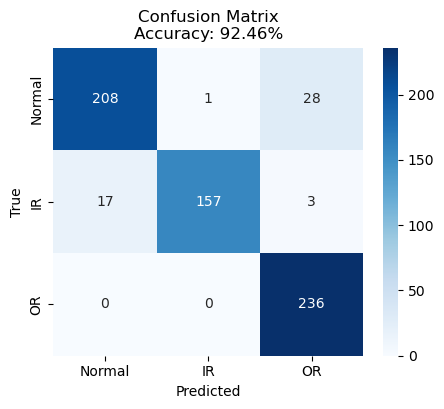

 - Model accuracy: 92.46%


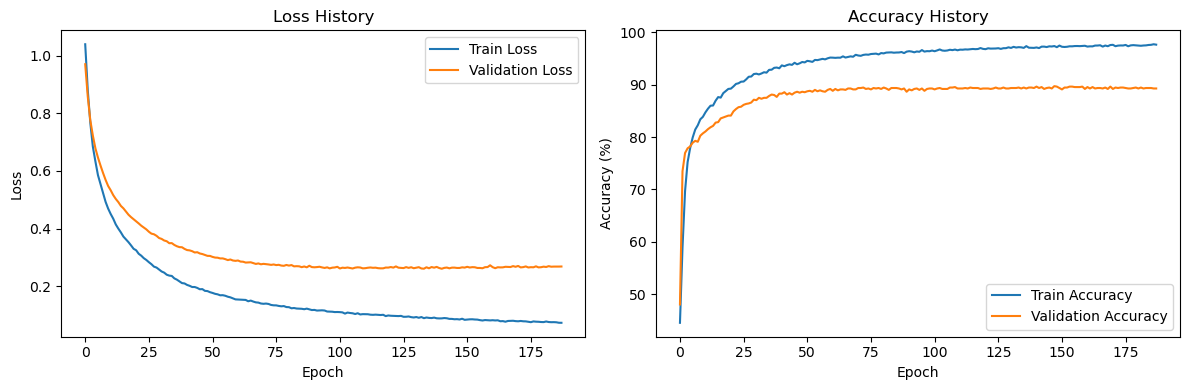

0.75
Early stopping at epoch 180


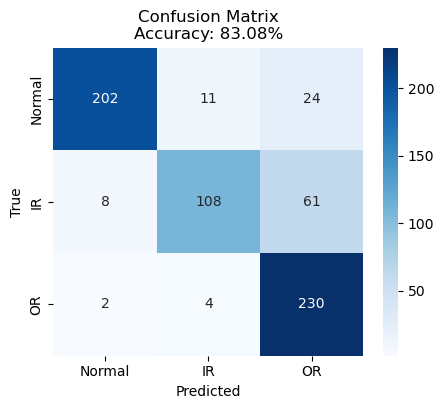

 - Model accuracy: 83.08%


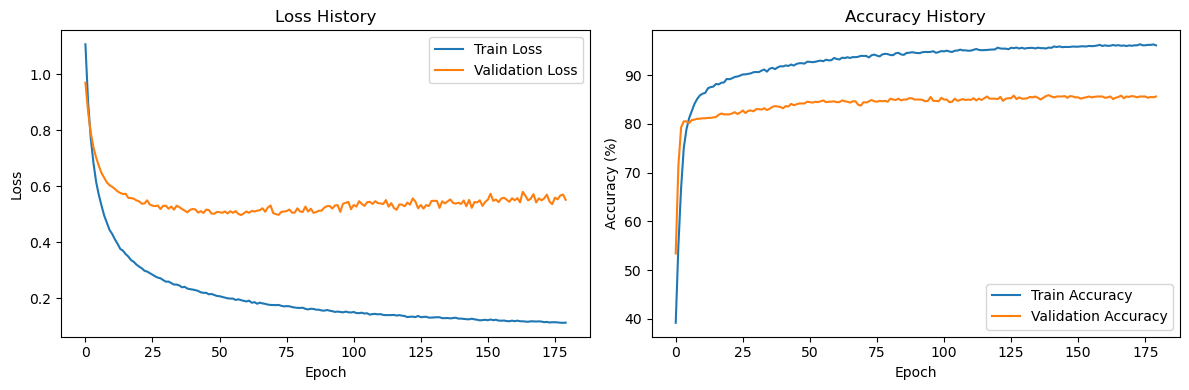

0.75
Early stopping at epoch 212


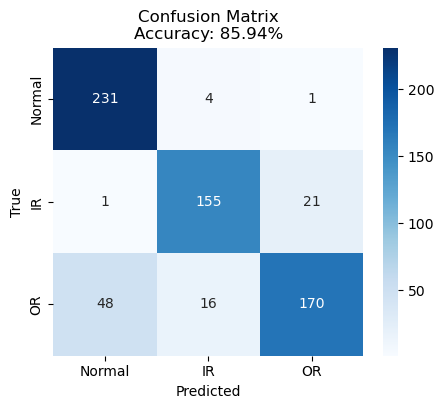

 - Model accuracy: 85.94%


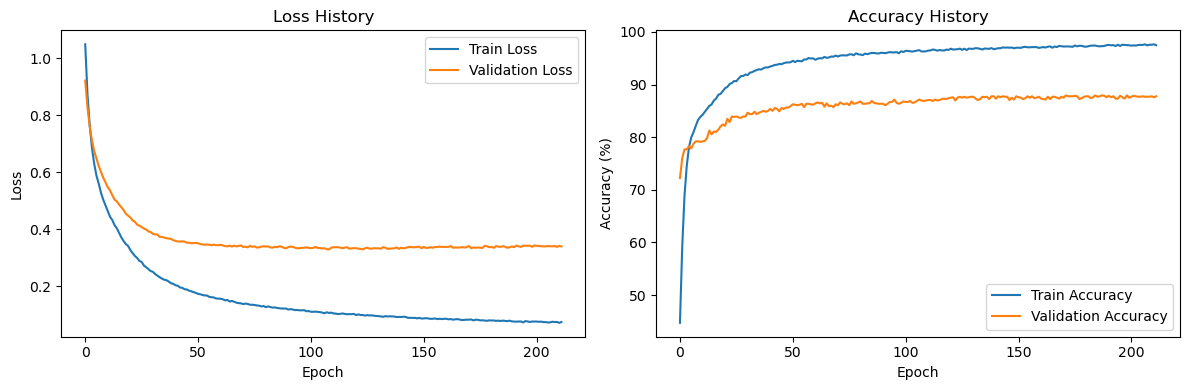

0.75
Early stopping at epoch 224


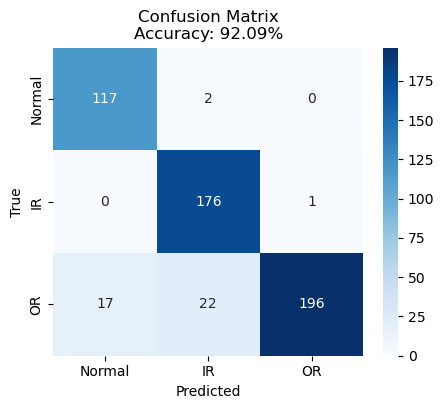

 - Model accuracy: 92.09%


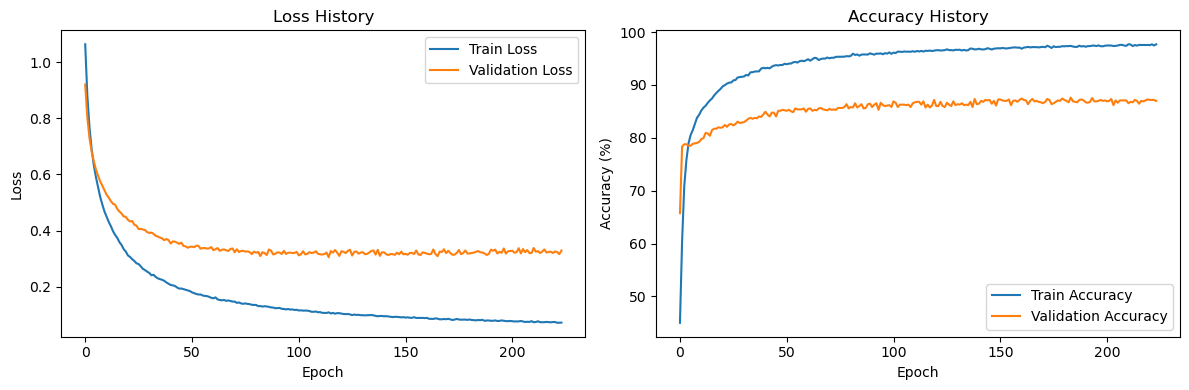

0.75
Early stopping at epoch 172


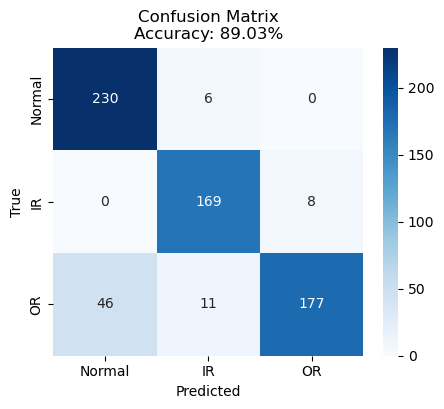

 - Model accuracy: 89.03%


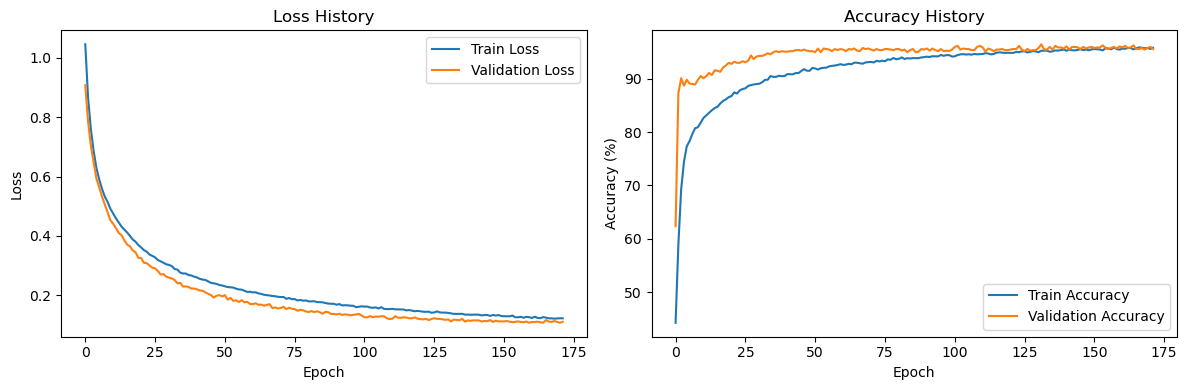

0.75
Early stopping at epoch 199


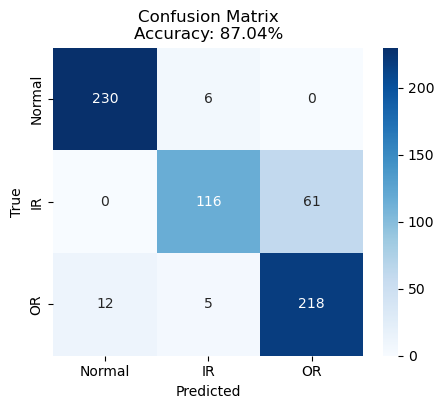

 - Model accuracy: 87.04%


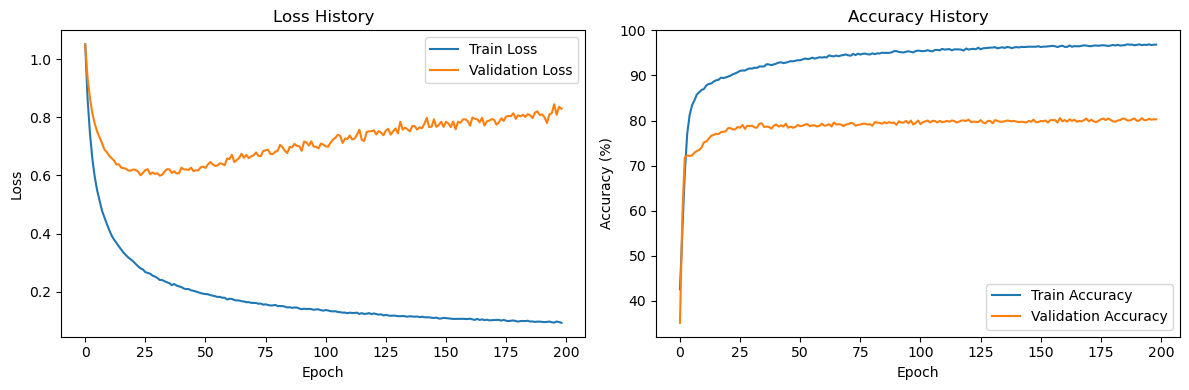

0.75
Early stopping at epoch 190


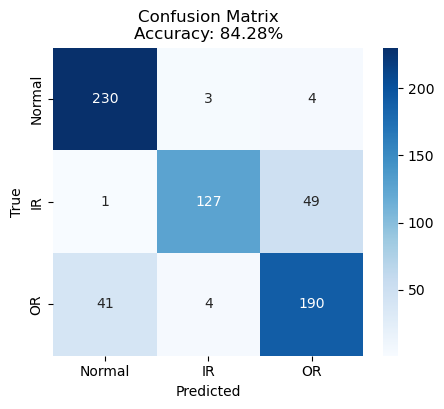

 - Model accuracy: 84.28%


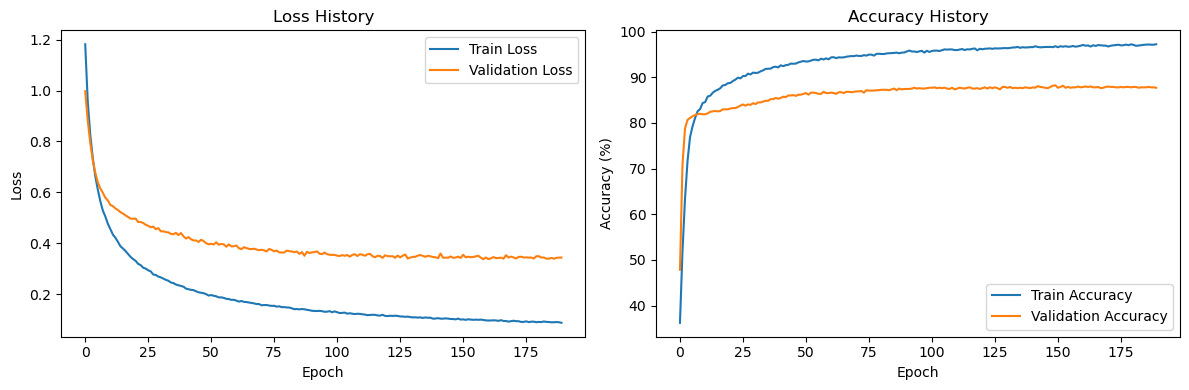

0.75
Early stopping at epoch 153


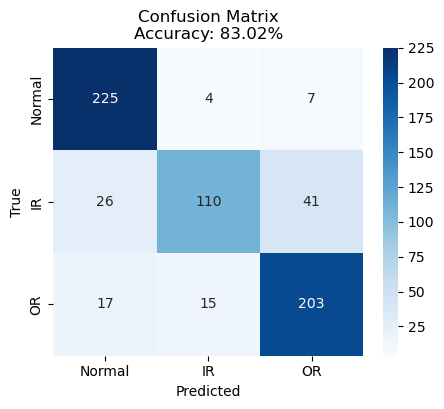

 - Model accuracy: 83.02%


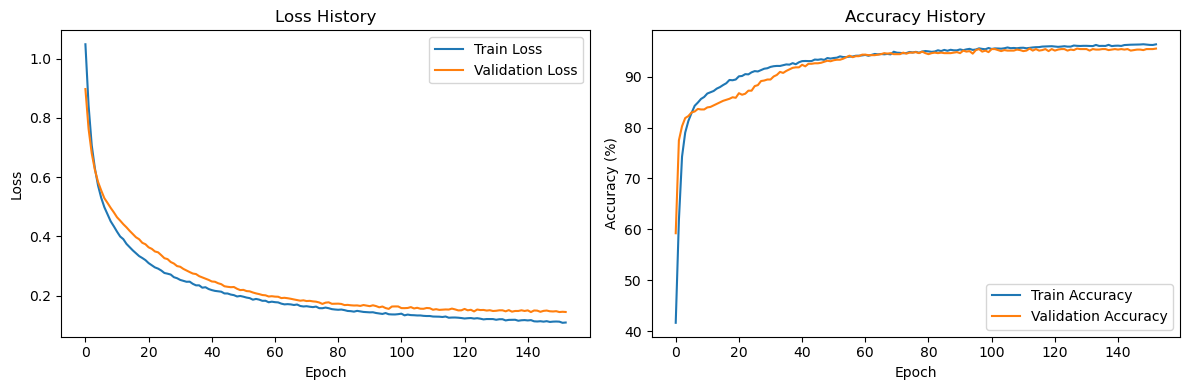

0.75
Early stopping at epoch 134


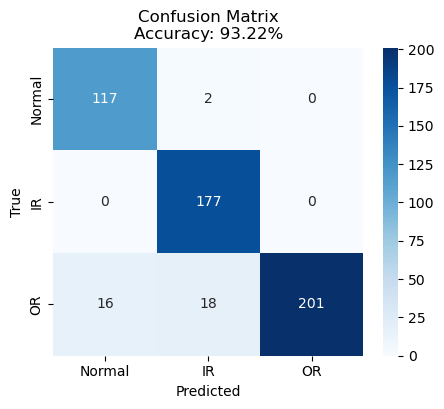

 - Model accuracy: 93.22%


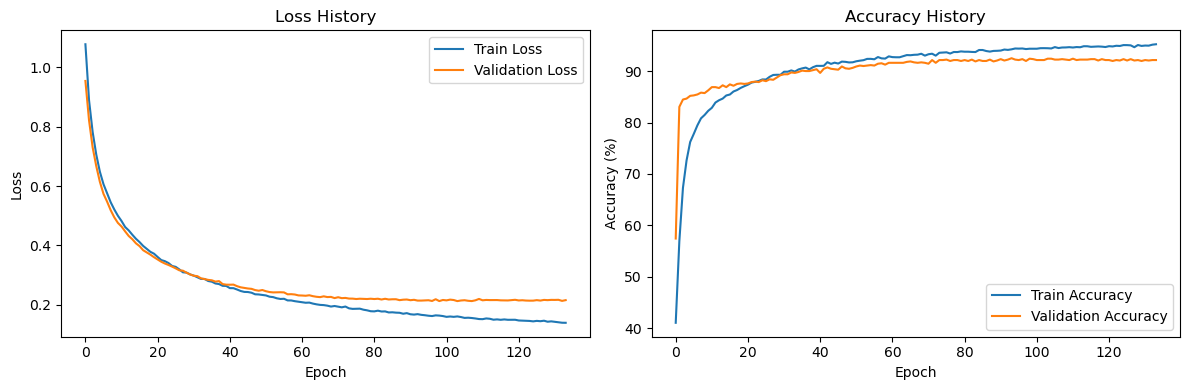

0.75
Early stopping at epoch 106


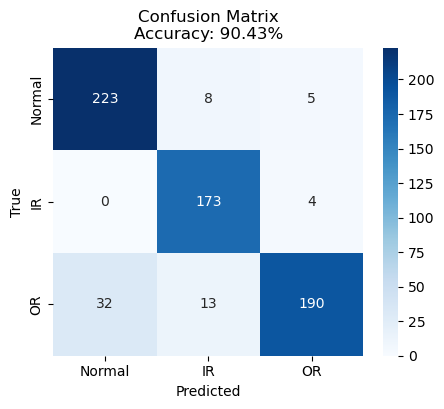

 - Model accuracy: 90.43%


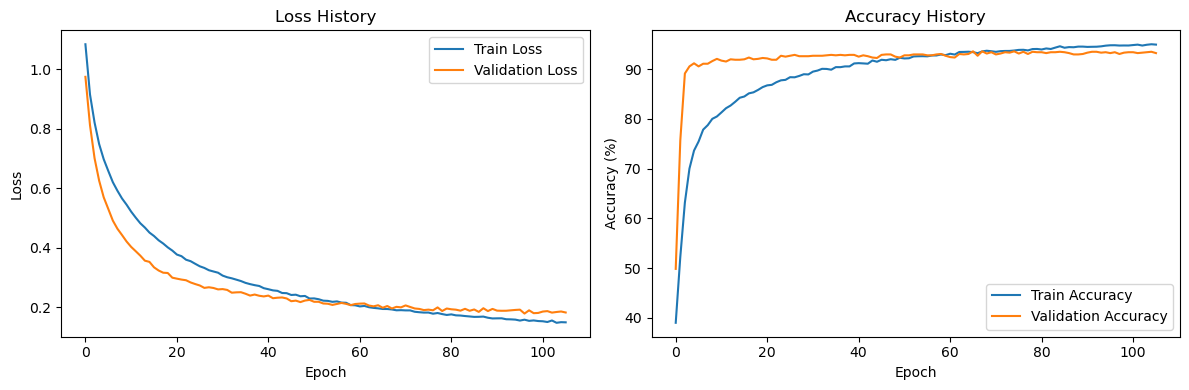

0.75
Early stopping at epoch 205


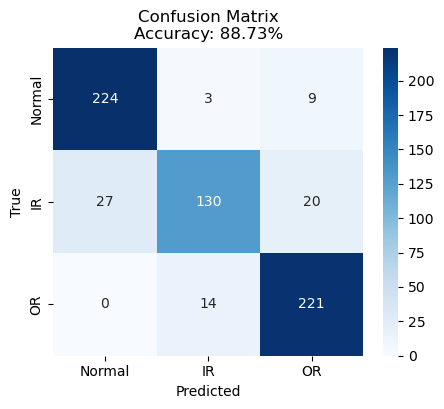

 - Model accuracy: 88.73%


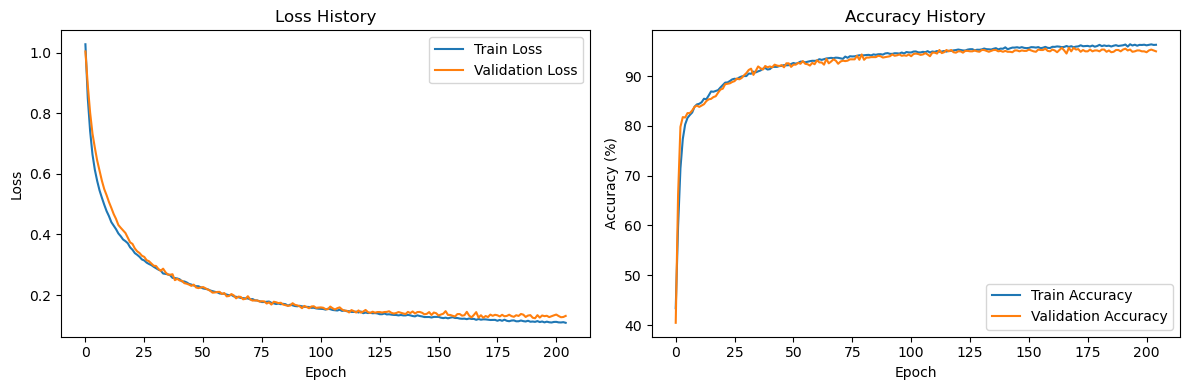

0.75
Early stopping at epoch 169


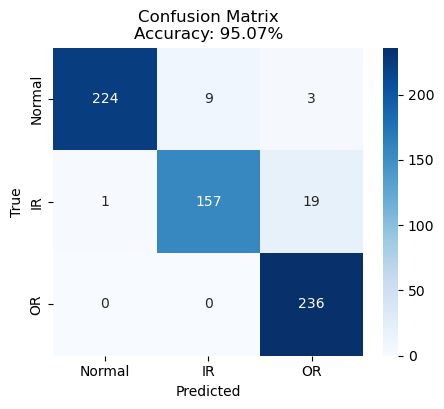

 - Model accuracy: 95.07%


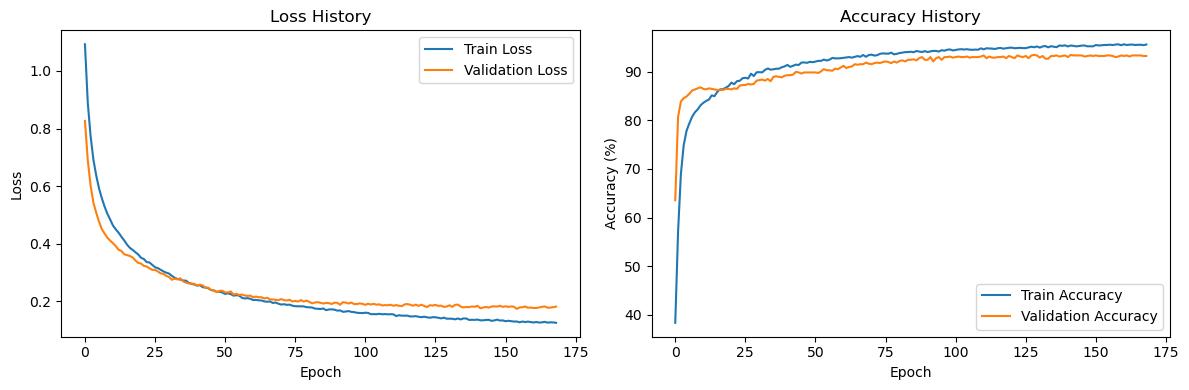

0.75
Early stopping at epoch 133


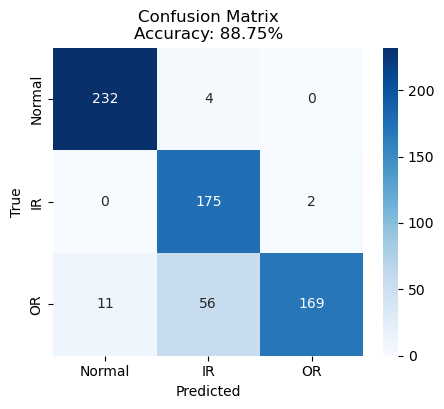

 - Model accuracy: 88.75%


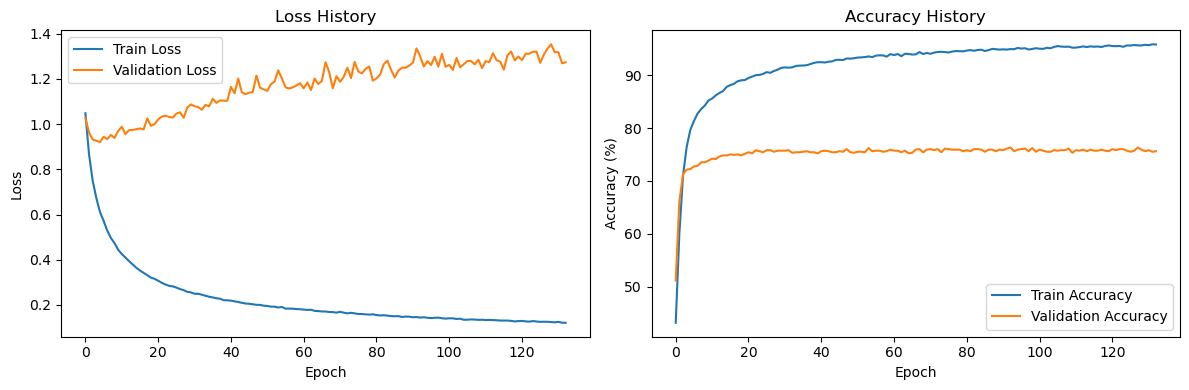

0.75
Early stopping at epoch 155


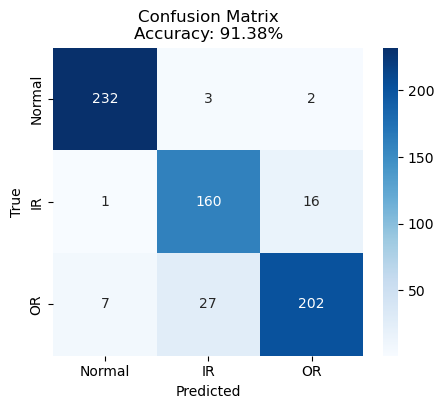

 - Model accuracy: 91.38%


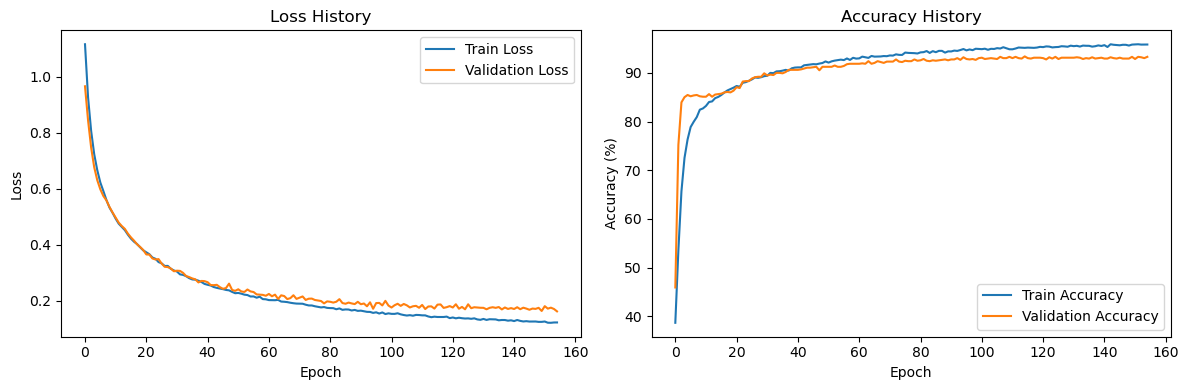

0.75
Early stopping at epoch 196


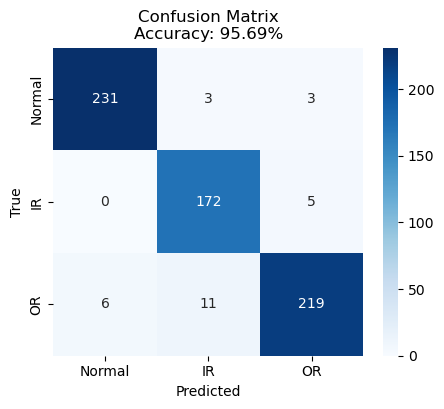

 - Model accuracy: 95.69%


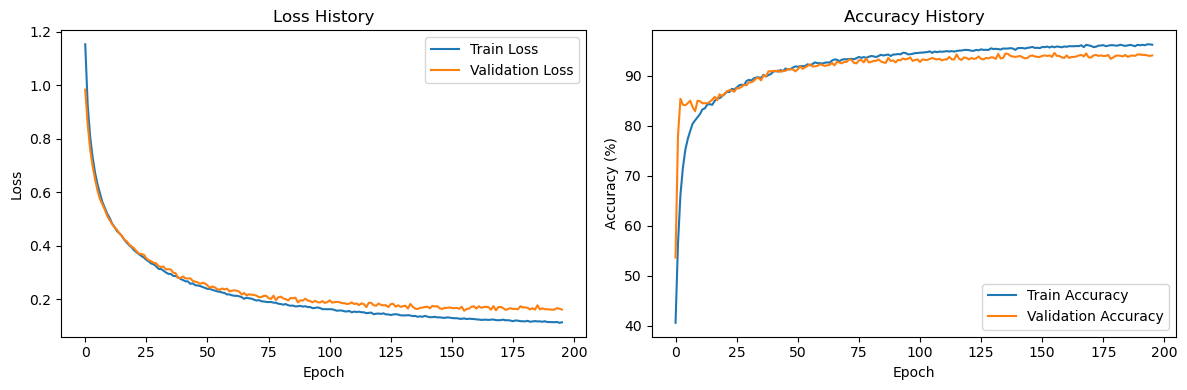

0.75
Early stopping at epoch 151


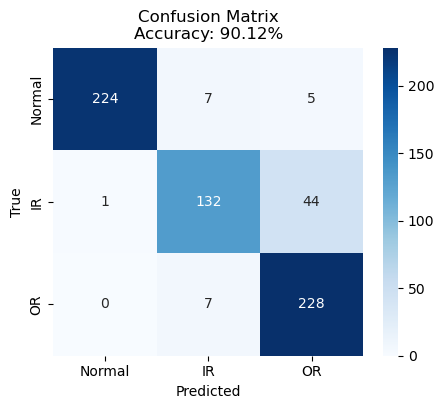

 - Model accuracy: 90.12%


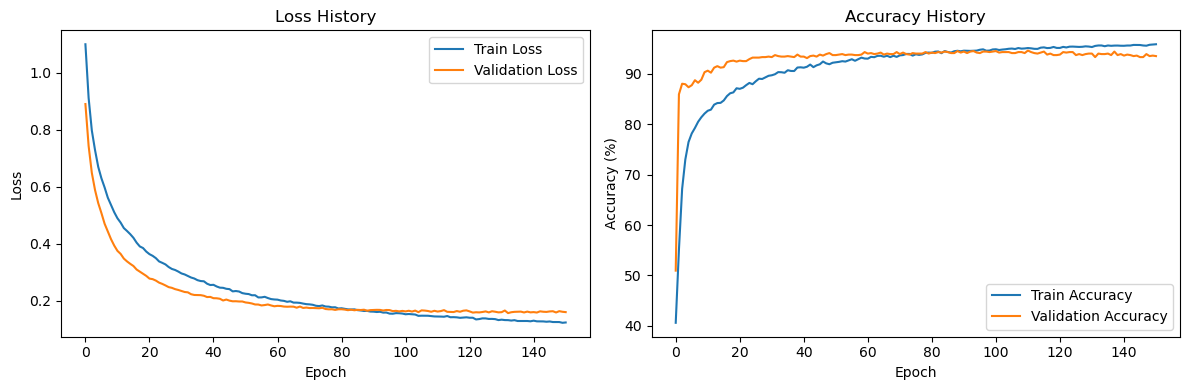

0.75
Early stopping at epoch 235


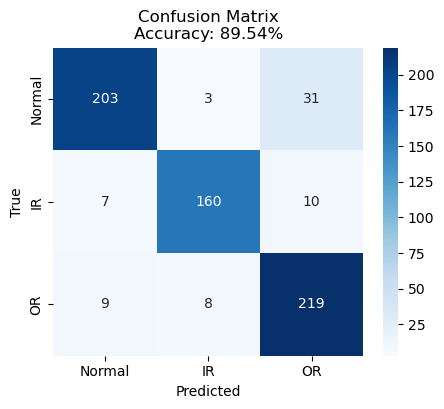

 - Model accuracy: 89.54%


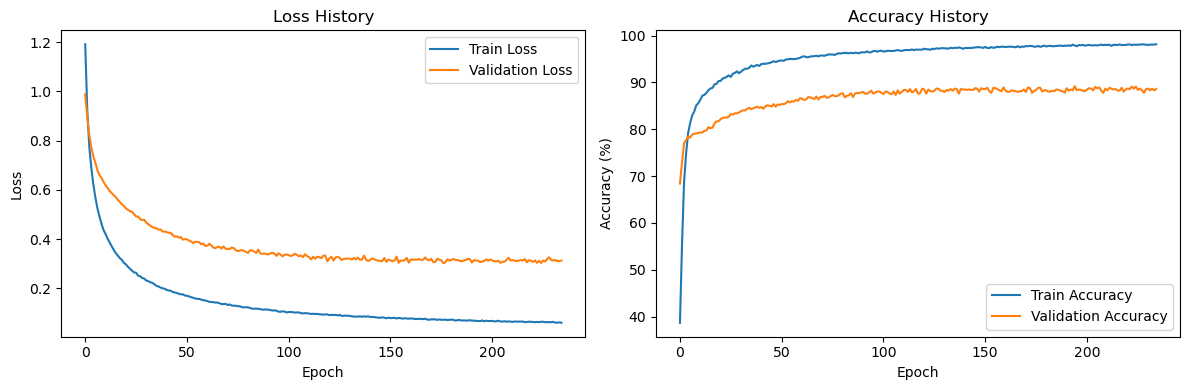

0.75
Early stopping at epoch 194


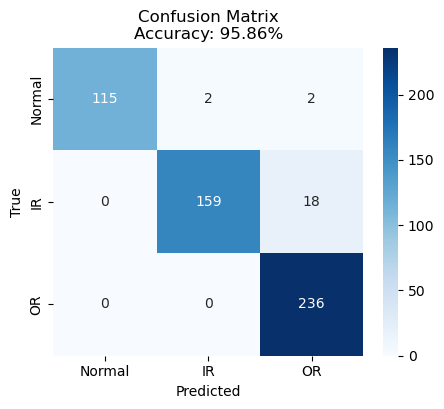

 - Model accuracy: 95.86%


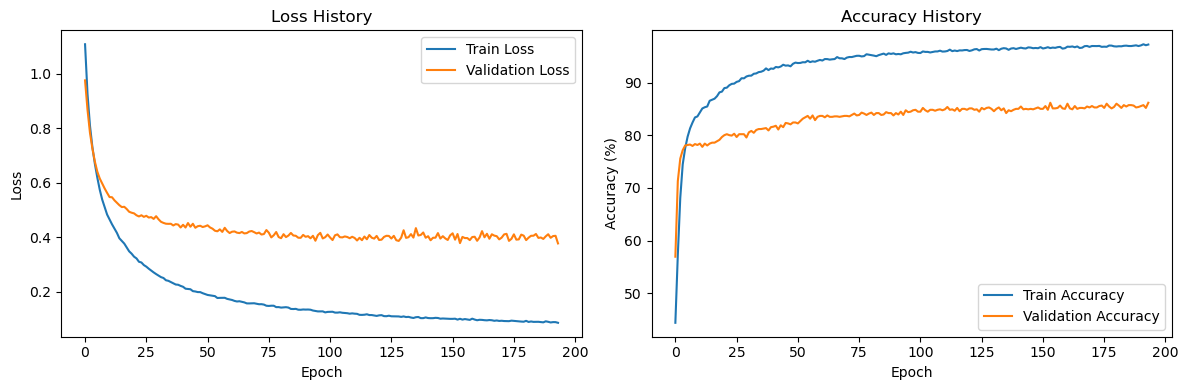

0.75
Early stopping at epoch 129


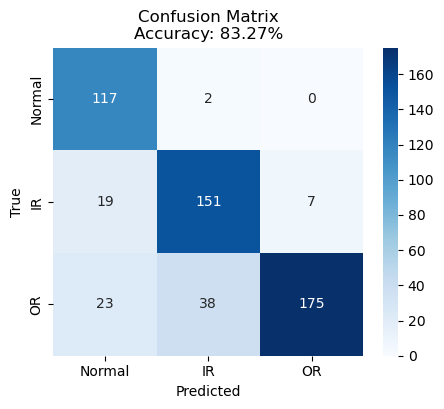

 - Model accuracy: 83.27%


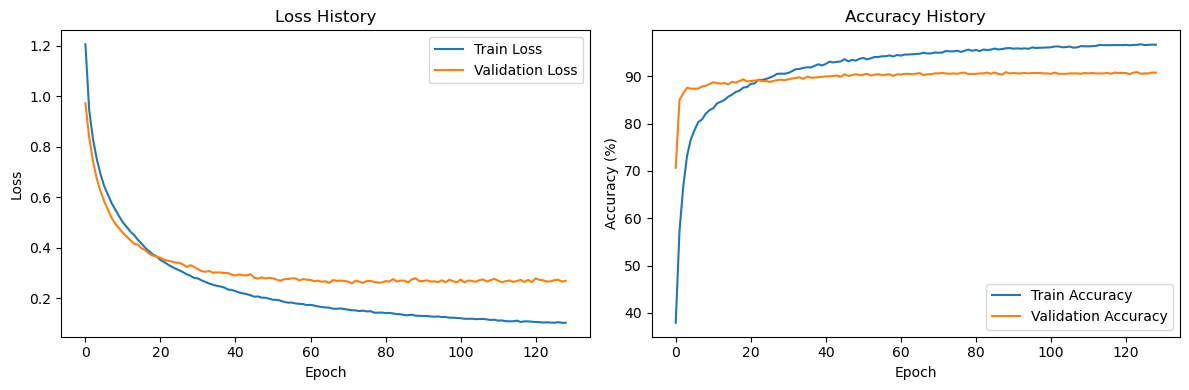

Mean accuracy: 0.8926086179866534
Std accuracy: 0.04385583023078213


In [1]:
import cfg
from src import data_loader as data_loader, models, trainer, evaluate
from torchinfo import summary
import torch.nn as nn
import torch.optim as optim
import numpy as np

accuracy_list = []

for i in range(30):
    trainer.set_seed(i)

    X_train, Y_train, X_val, Y_val, X_test, Y_test, test_files, len_processed = data_loader.data_import(cfg, 500)
    X_train = X_train *1e2
    X_val = X_val *1e2
    X_test = X_test *1e2
    train_loader, val_loader, test_loader = data_loader.create_dataloaders(X_train, Y_train, X_val, Y_val,X_test, Y_test, cfg, len_processed)

    model = models.Deeper1DCNN(1, cfg.NUM_CLASSES)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr= cfg.LEARNING_RATE) #weight_decay=1e-4
    scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max= cfg.NUM_EPOCHS, eta_min=cfg.LEARNING_RATE *1e-2)

    trained_model, history = trainer.train_model(model, train_loader, val_loader, criterion, optimizer, 'test.pth', scheduler, num_epochs=cfg.NUM_EPOCHS, device=cfg.DEVICE)

    accuracy = evaluate.plot_confusion_matrix(trained_model, test_loader, 'cpu', cfg.CLASS_NAMES)
    accuracy_list.append(accuracy)
    evaluate.plot_history(history)

print('='*20)
print('Mean accuracy:', np.mean(accuracy_list))
print('Std accuracy:', np.std(accuracy_list))